<style>
html, body, p{
    text-align: justify !important;
    text-justify: inter-word !important;
    font-size:22px !important;
}

.centrado{
    display:flex;
    align-items:center;
    justify-content:center;
    flex-direction:column;
    font-size:30px;
}
</style>

<div class="centrado"><img src="https://estadisticaccbas.uaa.mx/pluginfile.php/2/course/section/1/LOGOBENEMERITA_CIRCULAR.png?time=1606497553373" style="max-width: 508px;"></div>

<div class="centrado">

<b>Alumno</b>

Vélez Durán Enrique

279600

8 - A

Ingeniería en Computación Inteligente

Centro de Ciencias Básicas

<b>Tarea</b>

Práctica Momentos

27 de Mayo de 2024
</div>

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as kikin

In [5]:
def calcular_momentos_y_centroide(imagen):
    # Verificar si la imagen se ha cargado correctamente
    if imagen is None:
        print("Error: La imagen no se ha cargado correctamente.")
        return None, None, None, None, None
    
    # Convertir a escala de grises si es una imagen en color
    if len(imagen.shape) == 3:  
        imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    # Calcular momentos
    momentos = cv2.moments(imagen)
    momento_00 = momentos['m00']
    momento_10 = momentos['m10']
    momento_01 = momentos['m01']
    
    # Calcular el centroide
    if momento_00 != 0:
        x_centroide = momento_10 / momento_00
        y_centroide = momento_01 / momento_00
    else:
        x_centroide = y_centroide = None
    
    return momento_00, momento_10, momento_01, x_centroide, y_centroide

In [6]:
def trasladar_imagen(imagen, tx, ty):
    # Verificar si la imagen se ha cargado correctamente
    if imagen is None:
        print("Error: La imagen no se ha cargado correctamente.")
        return None
    
    # Matriz de transformación para trasladar la imagen
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    trasladada = cv2.warpAffine(imagen, M, (imagen.shape[1], imagen.shape[0]))
    return trasladada

In [7]:
# Ruta de la imagen
ruta_imagen_bn = "img/car.jpg"  # Ruta de la imagen en blanco y negro
ruta_imagen_color = "img/car.jpg"  # Ruta de la imagen en color

# Cargar imágenes
imagen_bn = cv2.imread(ruta_imagen_bn, cv2.IMREAD_GRAYSCALE)
imagen_color = cv2.imread(ruta_imagen_color)

# Verificar que las imágenes se hayan cargado correctamente
if imagen_bn is None:
    print(f"Error al cargar la imagen {ruta_imagen_bn}")
if imagen_color is None:
    print(f"Error al cargar la imagen {ruta_imagen_color}")

# Calcular momentos y centroides originales
resultados_bn = calcular_momentos_y_centroide(imagen_bn)
resultados_color = calcular_momentos_y_centroide(imagen_color)

# Trasladar imágenes
imagen_bn_trasladada = trasladar_imagen(imagen_bn, 50, 30)
imagen_color_trasladada = trasladar_imagen(imagen_color, 50, 30)

# Calcular momentos y centroides trasladados
resultados_bn_trasladados = calcular_momentos_y_centroide(imagen_bn_trasladada)
resultados_color_trasladados = calcular_momentos_y_centroide(imagen_color_trasladada)

# Imprime resultados
print("Resultados originales para la imagen en blanco y negro:")
print("Momento 00:", resultados_bn[0], "\nMomento 10:", resultados_bn[1], "\nMomento 01:", resultados_bn[2], "\nCentroide X:", resultados_bn[3], "Centroide Y:", resultados_bn[4])

print("\nResultados trasladados para la imagen en blanco y negro:")
print("Momento 00:", resultados_bn_trasladados[0], "\nMomento 10:", resultados_bn_trasladados[1], "\nMomento 01:", resultados_bn_trasladados[2], "\nCentroide X:", resultados_bn_trasladados[3], "Centroide Y:", resultados_bn_trasladados[4])

print("\nResultados originales para la imagen a color:")
print("Momento 00:", resultados_color[0], "\nMomento 10:", resultados_color[1], "\nMomento 01:", resultados_color[2], "\nCentroide X:", resultados_color[3], "Centroide Y:", resultados_color[4])

print("\nResultados trasladados para la imagen a color:")
print("Momento 00:", resultados_color_trasladados[0], "\nMomento 10:", resultados_color_trasladados[1], "\nMomento 01:", resultados_color_trasladados[2], "\nCentroide X:", resultados_color_trasladados[3], "Centroide Y:", resultados_color_trasladados[4])

Resultados originales para la imagen en blanco y negro:
Momento 00: 53694407.0 
Momento 10: 13575261824.0 
Momento 01: 13654709427.0 
Centroide X: 252.82450412386527 Centroide Y: 254.30412942264172

Resultados trasladados para la imagen en blanco y negro:
Momento 00: 44476899.0 
Momento 10: 12213299792.0 
Momento 01: 11790517319.0 
Centroide X: 274.59872577897124 Centroide Y: 265.09306143398175

Resultados originales para la imagen a color:
Momento 00: 53694407.0 
Momento 10: 13575261824.0 
Momento 01: 13654709427.0 
Centroide X: 252.82450412386527 Centroide Y: 254.30412942264172

Resultados trasladados para la imagen a color:
Momento 00: 44476899.0 
Momento 10: 12213299792.0 
Momento 01: 11790517319.0 
Centroide X: 274.59872577897124 Centroide Y: 265.09306143398175


In [8]:
# Función para mostrar imágenes con centroides marcados
def mostrar_imagen_con_centroide(imagen, centroid_x, centroid_y, titulo):
    if imagen is None:
        print(f"Error: La imagen para {titulo} no se ha cargado correctamente.")
        return
    
    if len(imagen.shape) == 2:  # Imagen en escala de grises
        kikin.imshow(imagen, cmap='gray')
    else:  # Imagen en color
        kikin.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    if centroid_x is not None and centroid_y is not None:
        kikin.scatter(centroid_x, centroid_y, color='red', s=40, marker='x')
    kikin.title(titulo)
    kikin.axis('off')

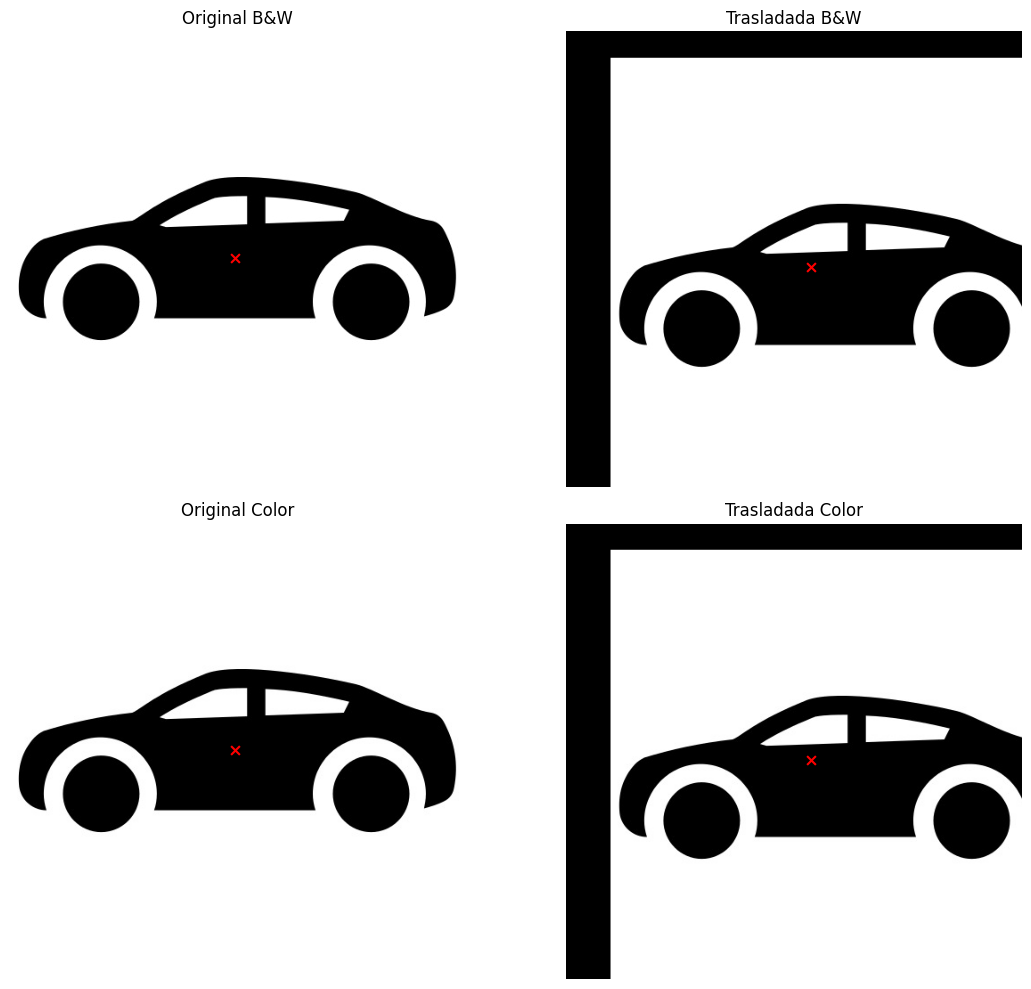

In [9]:
# Mostrar las imágenes originales y trasladadas con sus centroides
kikin.figure(figsize=(12, 10))
kikin.subplot(2, 2, 1)
mostrar_imagen_con_centroide(imagen_bn, resultados_bn[3], resultados_bn[4], 'Original B&W')
kikin.subplot(2, 2, 2)
mostrar_imagen_con_centroide(imagen_bn_trasladada, resultados_bn_trasladados[3], resultados_bn_trasladados[4], 'Trasladada B&W')
kikin.subplot(2, 2, 3)
mostrar_imagen_con_centroide(imagen_color, resultados_color[3], resultados_color[4], 'Original Color')
kikin.subplot(2, 2, 4)
mostrar_imagen_con_centroide(imagen_color_trasladada, resultados_color_trasladados[3], resultados_color_trasladados[4], 'Trasladada Color')
kikin.tight_layout()
kikin.show()